# Music Informatics: Project

- Vasileios Katsaitis  (1115202000073)
- Dimokritos Kolitsos  (1115201900085)
- Konstantinos Chousos (1115202000215) 

In [1]:
import os
import librosa
import numpy as np
import pandas as pd

sample_rate = 44100
duration = 120 # 2 minutes

def trim_starting_zeros(audio):
    # Find the first non-zero sample
    non_zero_index = np.nonzero(audio)[0]
    if len(non_zero_index) > 0:
        return audio[non_zero_index[0]:]
    return audio

def load_and_trim_audio(file_path):
    audio, sr = librosa.load(file_path, sr=sample_rate)
    
    audio = librosa.util.normalize(audio) # <-------!!!!
    
    # Trim any starting silence
    trimmed_audio = trim_starting_zeros(audio)
    
    # Take only the first 'duration' seconds after trimming
    trimmed_audio = trimmed_audio[:duration * sample_rate]
    
    return trimmed_audio

def load_audio_dataset(base_path):
    data = []
    for root, _, files in os.walk(base_path):
        for file in files:
            if file.endswith('.mp3'):
                file_path = os.path.join(root, file)
                # Load, trim silence, and get the first 'duration' seconds
                audio = load_and_trim_audio(file_path)
                genre = os.path.basename(os.path.dirname(file_path))
                song_name = os.path.splitext(file)[0]
                data.append({
                    'song_name': song_name,
                    'genre': genre,
                    'audio': audio,
                })
    return pd.DataFrame(data)

# Load the dataset
df = load_audio_dataset('./data')

In [2]:
import pickle

with open('./data/df.pkl', 'wb') as f:
   pickle.dump(df, f)

del df

In [3]:
with open('./data/df.pkl', 'rb') as f:
   df = pickle.load(f)

In [4]:
display(df)

,song_name,genre,audio
0,BadBadNotGood - Triangle,jazz,"[1.8534026e-07, 4.294331e-07, 4.797495e-07, 1...."
1,Bill Evans Trio - Autumn Leaves,jazz,"[-1.1352264e-17, 2.2846427e-17, 1.089171e-17, ..."
2,Charles Mingus - Better Git It in Your Soul,jazz,"[-5.4656553e-05, -9.119155e-05, -7.734158e-05,..."
3,Cortex - Sans toi,jazz,"[1.9952068e-07, -1.1385721e-06, -8.4504427e-07..."
4,"Dave Brubeck, The Dave Brubeck Quartet - Take ...",jazz,"[9.1003814e-26, 9.065531e-23, 1.3221138e-21, -..."
5,Gerry Mulligan - Prelude In E Minor,jazz,"[-1.08011803e-19, -3.5464236e-18, -4.6286238e-..."
6,John Coltrane - But Not for Me,jazz,"[-4.0487368e-05, -3.098403e-05, -4.692908e-06,..."
7,Miles Davis - So What,jazz,"[-1.2861599e-27, -1.3292766e-25, -1.7426277e-2..."
8,Ryo Fukui - Scenery,jazz,"[-7.0728303e-23, -3.941833e-21, -2.6847423e-20..."
9,Snarky Puppy - Shofukan (We Like It Here),jazz,"[1.0504064e-27, 8.2465645e-26, 1.1234918e-24, ..."


### 3.C. Timbre & Spectral Shape

#### 3.C.1. MFCCs

Extracting MFCCs with 13 coefficients and inspecting the differences between the mean, median and standard deviation for a song from each genre

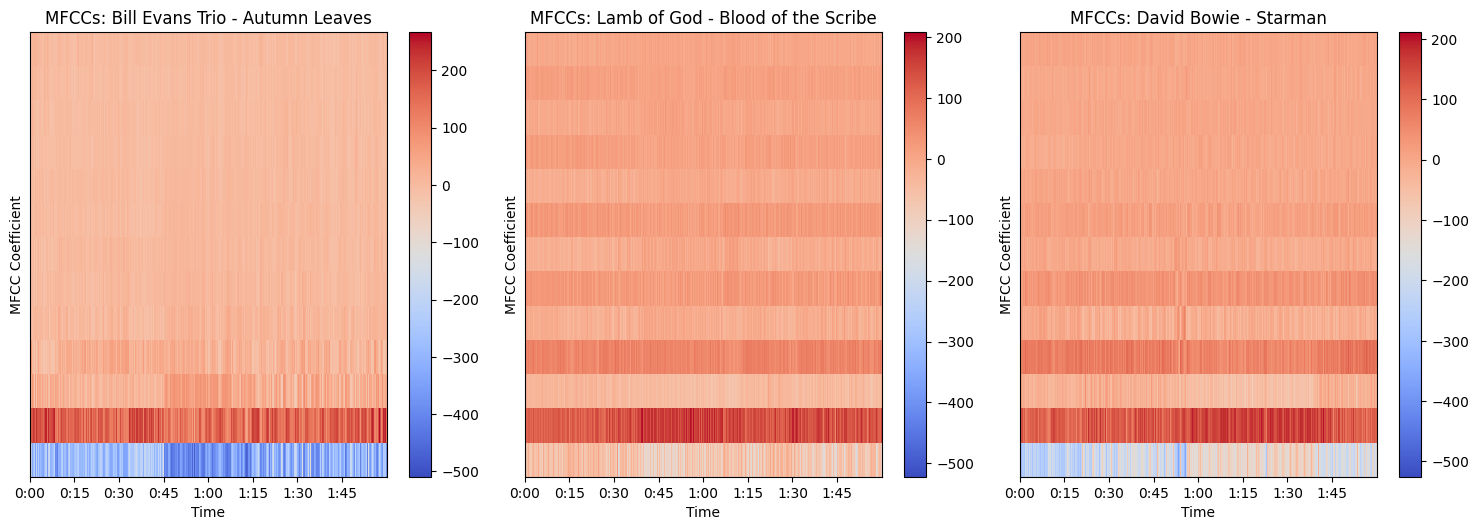

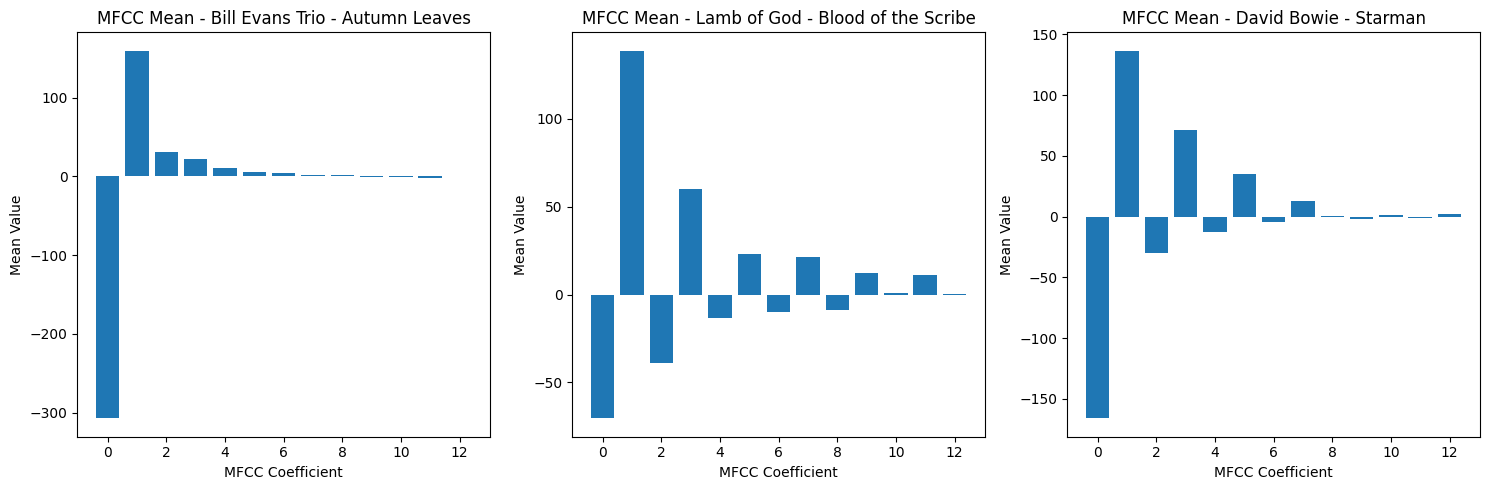

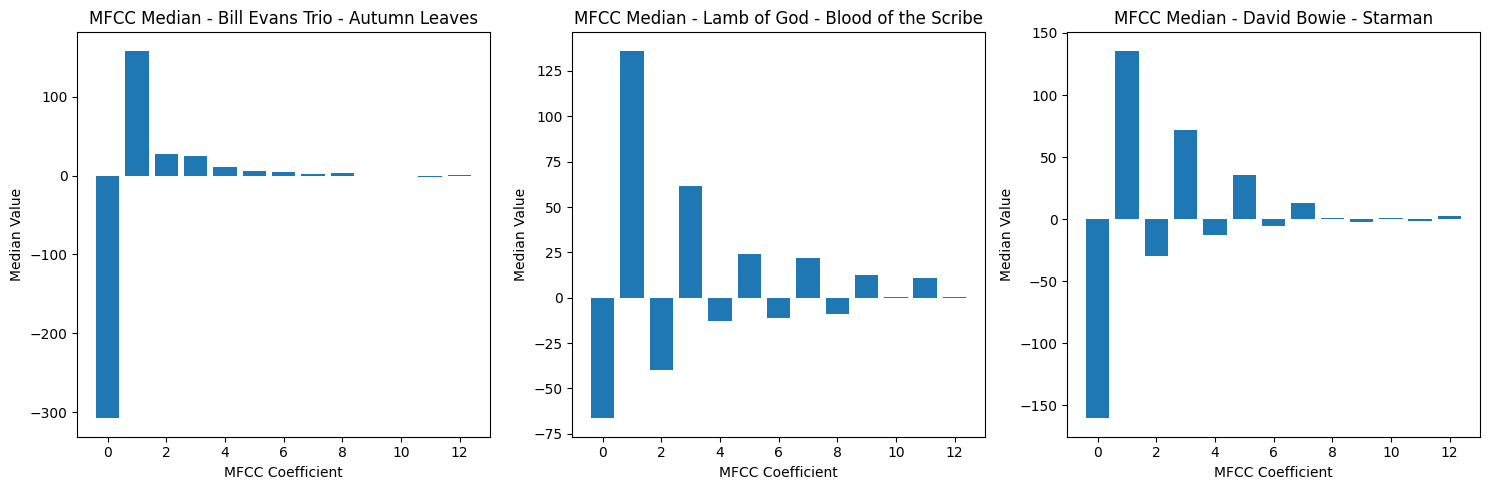

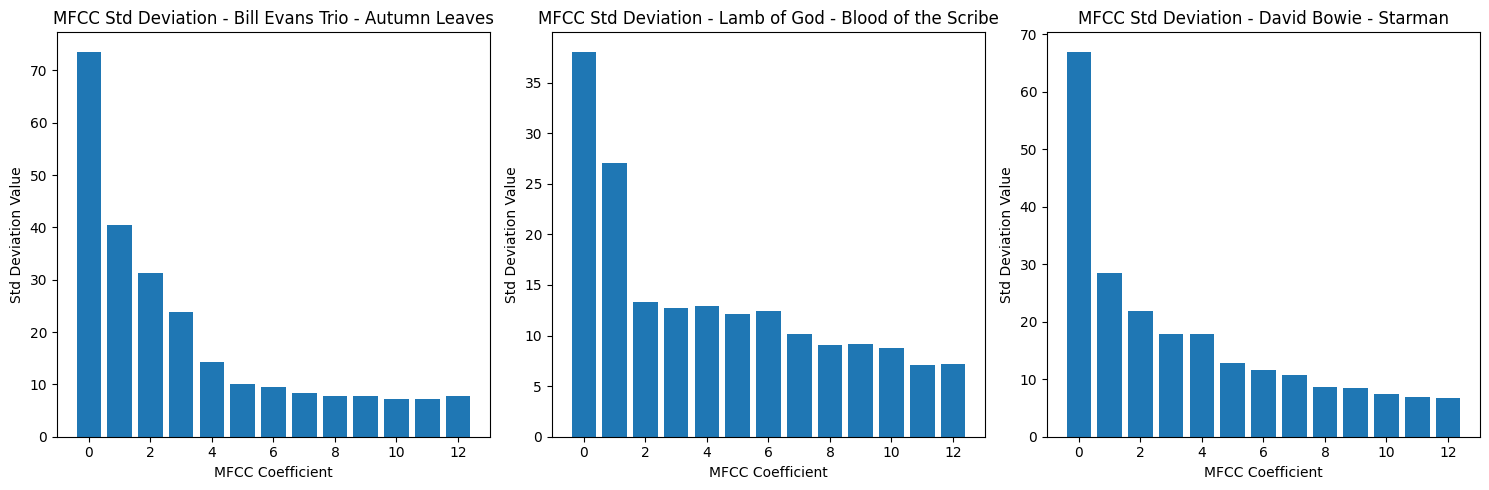

In [5]:
import matplotlib.pyplot as plt
import librosa.display

def extract_mfccs(audio, sr, n_mfcc):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def compute_mfcc_stats(mfccs):
    mean = np.mean(mfccs, axis=1)
    median = np.median(mfccs, axis=1)
    std = np.std(mfccs, axis=1)
    return mean, median, std

# Extract MFCCs and compute the mean median and standard deviation for each song
mfcc_features = []

for _, row in df.iterrows():
    mfccs = extract_mfccs(row['audio'], sample_rate, n_mfcc=13)
    mean, median, std = compute_mfcc_stats(mfccs)
    mfcc_features.append({
        'song_name': row['song_name'],
        'genre': row['genre'],
        'mfccs': mfccs,
        'mfcc_mean': mean,
        'mfcc_median': median,
        'mfcc_std': std
    })

mfcc_df = pd.DataFrame(mfcc_features)

# Indices of a song from each genre
example_indices = [1, 15, 23]

# Plot MFCCs heatmap for the selected songs from each genre
plt.figure(figsize=(15, 10))
for i, j in enumerate(example_indices):
    plt.subplot(2, 3, i+4)
    librosa.display.specshow(mfcc_df.iloc[j]['mfccs'], sr=sample_rate, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs: {mfcc_df.iloc[j]['song_name']}")
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficient')
plt.tight_layout()
plt.show()

# Visualize MFCC mean for the selected songs from each genre
plt.figure(figsize=(15, 5))
for i, j in enumerate(example_indices):
    plt.subplot(1, 3, i+1)
    plt.bar(range(13), mfcc_df.iloc[j]['mfcc_mean'])
    plt.title(f"MFCC Mean - {mfcc_df.iloc[j]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

# Visualize MFCC median for the selected songs from each genre
plt.figure(figsize=(15, 5))
for i, j in enumerate(example_indices):
    plt.subplot(1, 3, i+1)
    plt.bar(range(13), mfcc_df.iloc[j]['mfcc_median'])
    plt.title(f"MFCC Median - {mfcc_df.iloc[j]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Median Value')
plt.tight_layout()
plt.show()

# Visualize MFCC standard deviation for the selected songs from each genre
plt.figure(figsize=(15, 5))
for i, j in enumerate(example_indices):
    plt.subplot(1, 3, i+1)
    plt.bar(range(13), mfcc_df.iloc[j]['mfcc_std'])
    plt.title(f"MFCC Std Deviation - {mfcc_df.iloc[j]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Std Deviation Value')
plt.tight_layout()
plt.show()

Repeating the same proccess and experimenting with different values of coefficients

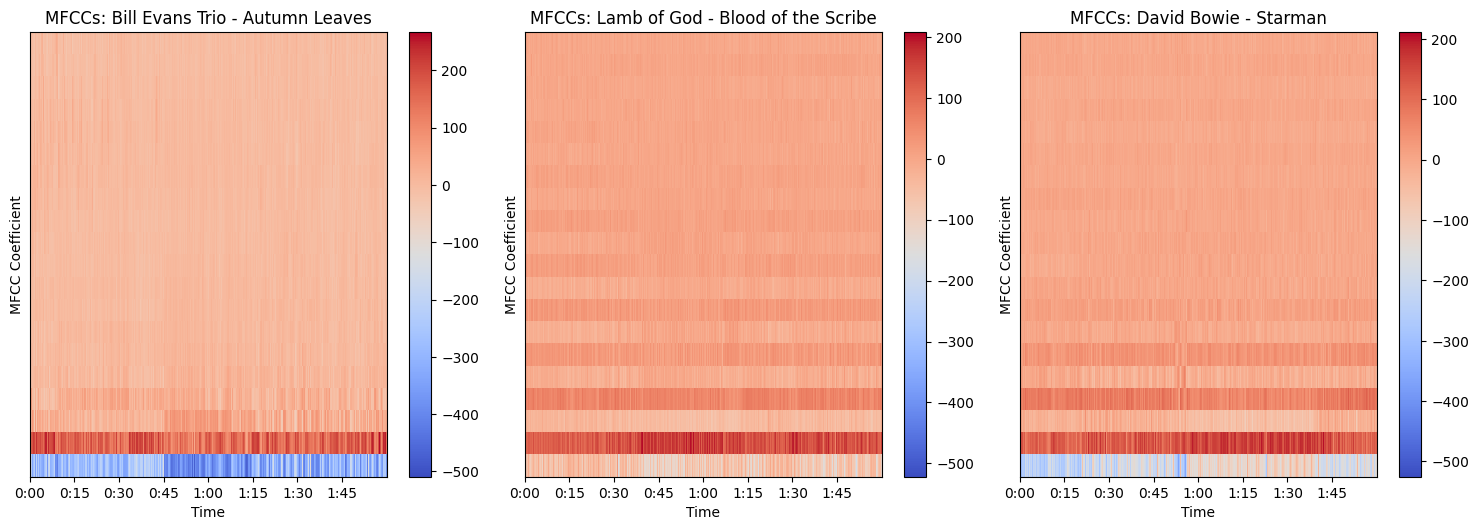

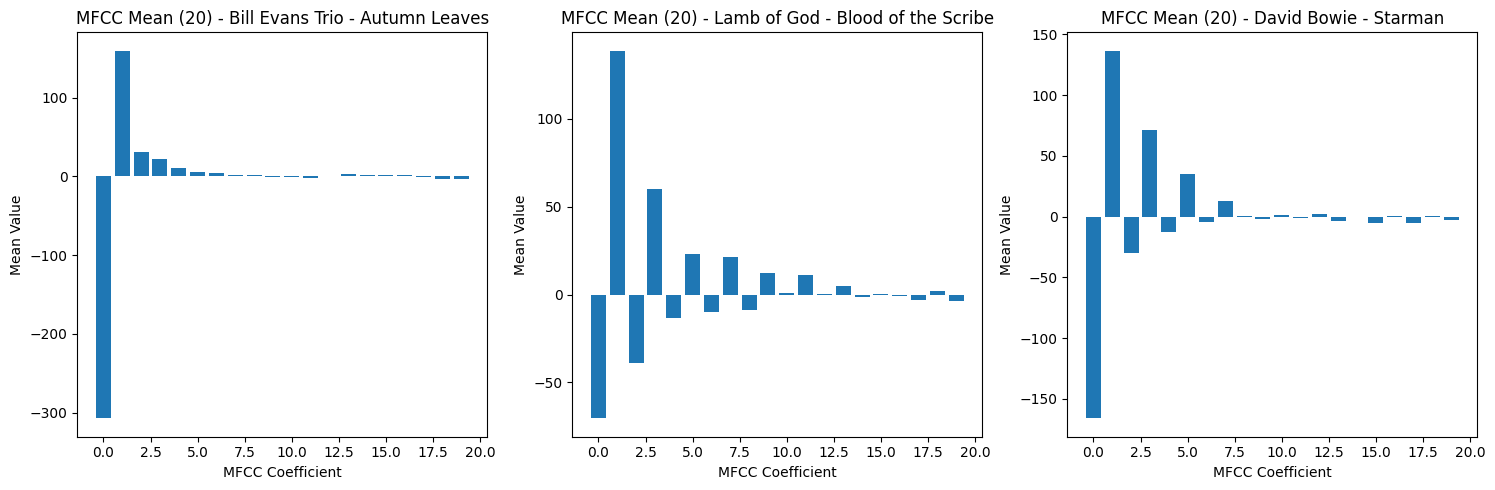

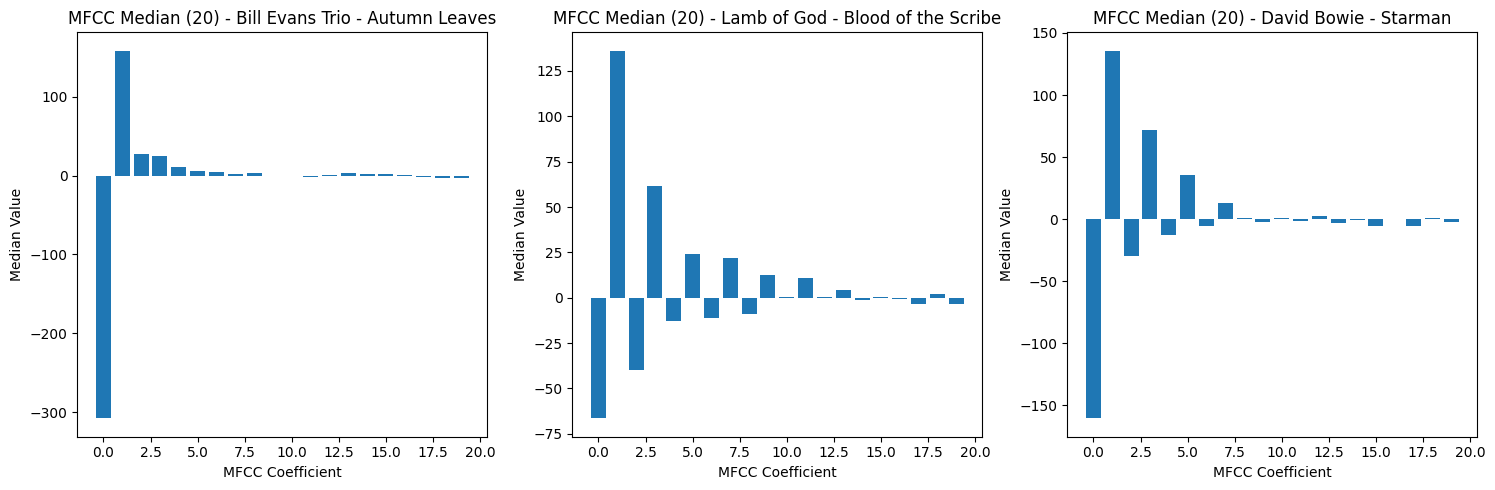

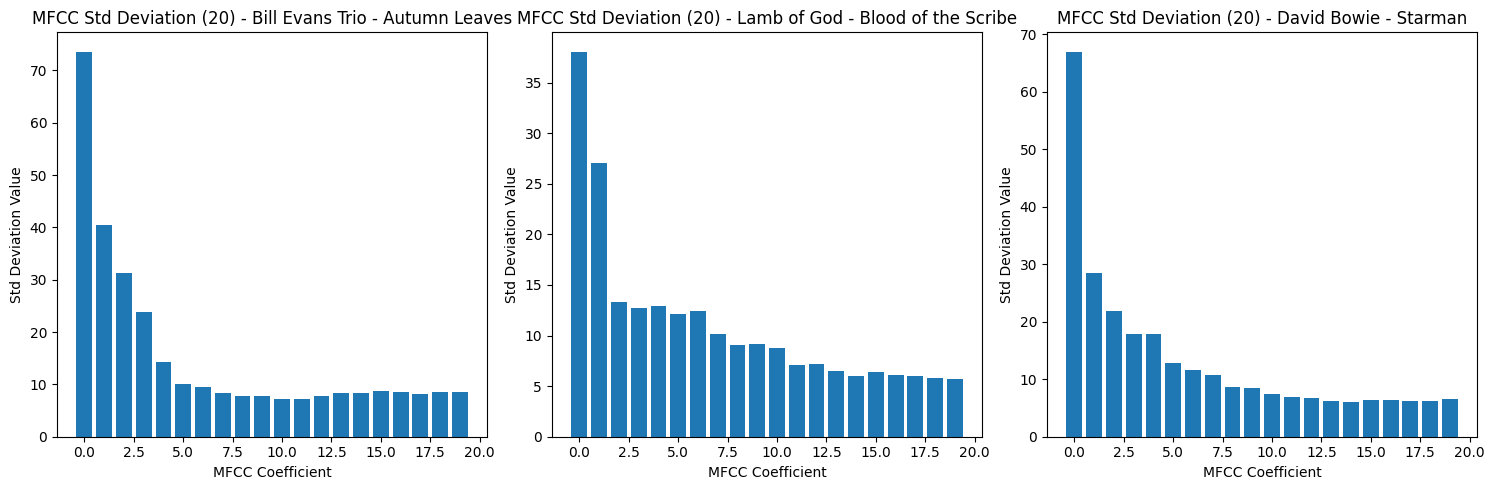

In [6]:
mfcc_features_20 = []

for _, row in df.iterrows():
    mfccs = extract_mfccs(row['audio'], sample_rate, n_mfcc=20)
    mean, median, std = compute_mfcc_stats(mfccs)
    mfcc_features_20.append({
        'song_name': row['song_name'],
        'genre': row['genre'],
        'mfccs': mfccs,
        'mfcc_mean': mean,
        'mfcc_median': median,
        'mfcc_std': std
    })

mfcc_df_20 = pd.DataFrame(mfcc_features_20)

# Plot MFCCs as heatmap for the selected songs
plt.figure(figsize=(15, 10))
for i, j in enumerate(example_indices):
    plt.subplot(2, 3, i+4)
    librosa.display.specshow(mfcc_df_20.iloc[j]['mfccs'], sr=sample_rate, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs: {mfcc_df_20.iloc[j]['song_name']}")
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficient')
plt.tight_layout()
plt.show()

# Visualize MFCC mean for the selected songs
plt.figure(figsize=(15, 5))
for i, j in enumerate(example_indices):
    plt.subplot(1, 3, i+1)
    plt.bar(range(20), mfcc_df_20.iloc[j]['mfcc_mean'])
    plt.title(f"MFCC Mean (20) - {mfcc_df_20.iloc[j]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

# Visualize MFCC median for the selected songs
plt.figure(figsize=(15, 5))
for i, j in enumerate(example_indices):
    plt.subplot(1, 3, i+1)
    plt.bar(range(20), mfcc_df_20.iloc[j]['mfcc_median'])
    plt.title(f"MFCC Median (20) - {mfcc_df_20.iloc[j]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Median Value')
plt.tight_layout()
plt.show()

# Visualize MFCC standard deviation for the selected songs
plt.figure(figsize=(15, 5))
for i, j in enumerate(example_indices):
    plt.subplot(1, 3, i+1)
    plt.bar(range(20), mfcc_df_20.iloc[j]['mfcc_std'])
    plt.title(f"MFCC Std Deviation (20) - {mfcc_df_20.iloc[j]['song_name']}")
    plt.xlabel('MFCC Coefficient')
    plt.ylabel('Std Deviation Value')
plt.tight_layout()
plt.show()

Try to get a grasp of how different is the MFCCs from songs of the 3 different genres

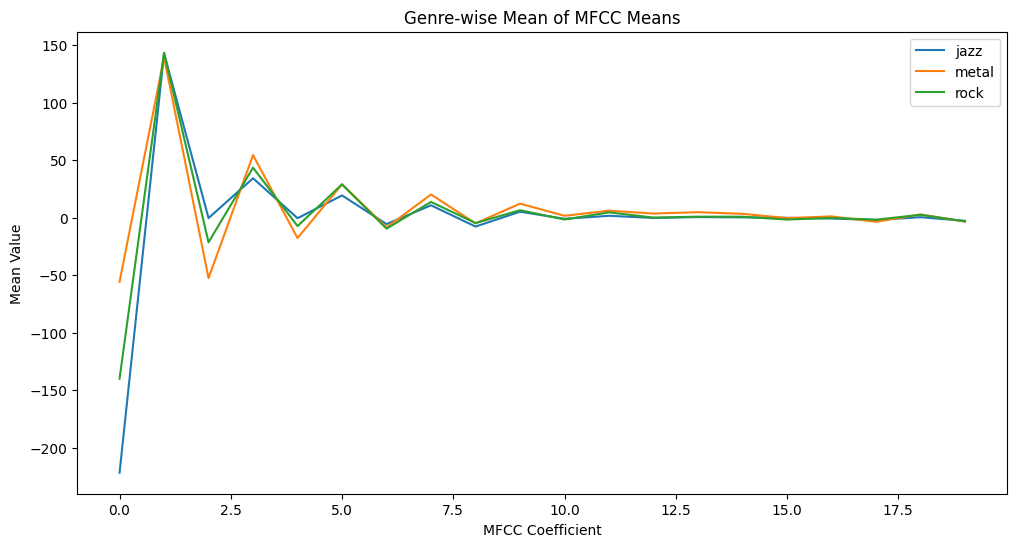

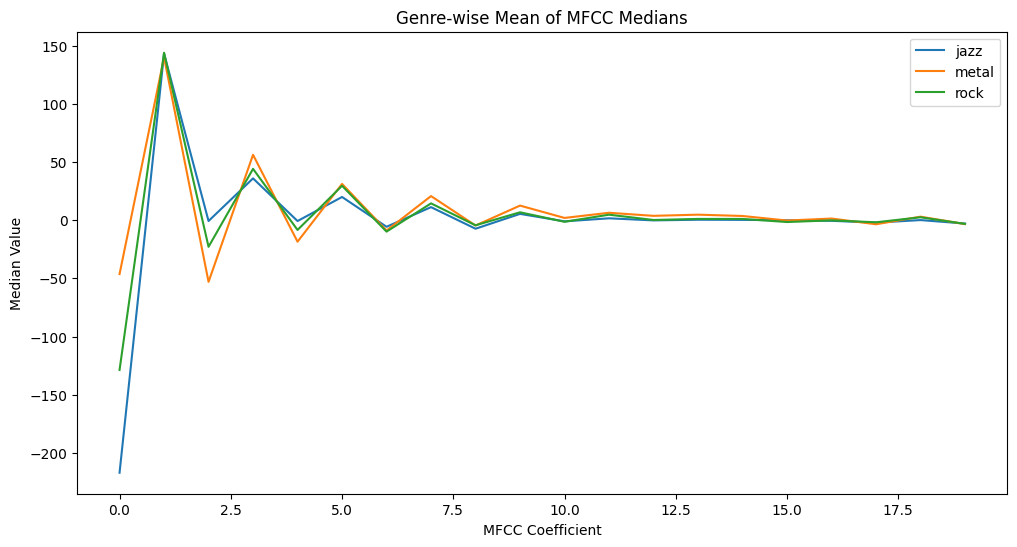

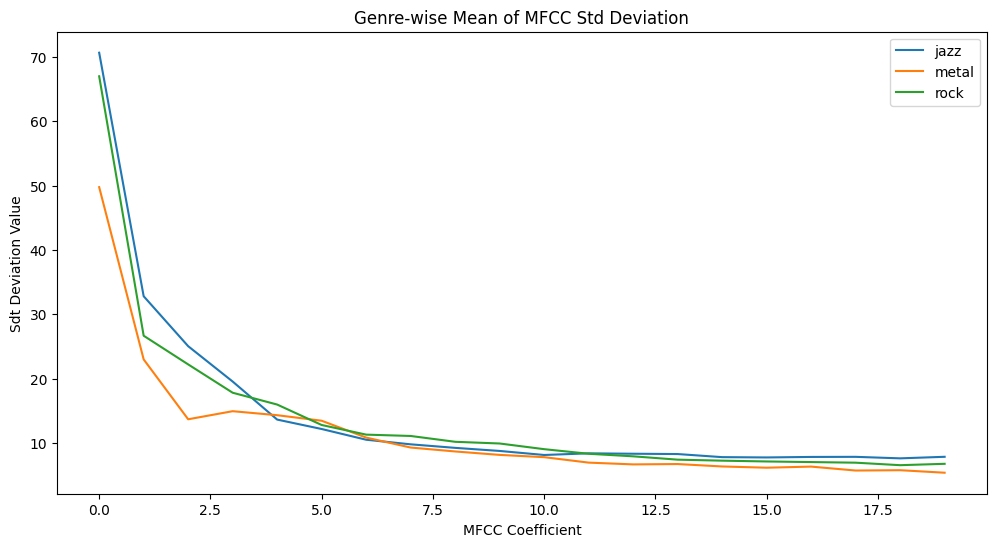

In [7]:
# Check the differentiation of MFCCs in each genre
mfcc_means = np.array(mfcc_df_20['mfcc_mean'].tolist())
genre_mfcc_means = pd.DataFrame(mfcc_means, index=mfcc_df_20['genre']).groupby(level=0).mean()

# Visualize genre-wise MFCC means
plt.figure(figsize=(12, 6))
for genre in genre_mfcc_means.index:
    plt.plot(genre_mfcc_means.loc[genre], label=genre)
plt.title('Genre-wise Mean of MFCC Means')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

mfcc_medians = np.array(mfcc_df_20['mfcc_median'].tolist())
genre_mfcc_medians = pd.DataFrame(mfcc_medians, index=mfcc_df_20['genre']).groupby(level=0).mean()

# Visualize genre-wise MFCC medians
plt.figure(figsize=(12, 6))
for genre in genre_mfcc_medians.index:
    plt.plot(genre_mfcc_medians.loc[genre], label=genre)
plt.title('Genre-wise Mean of MFCC Medians')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Median Value')
plt.legend()
plt.show()

mfcc_std = np.array(mfcc_df_20['mfcc_std'].tolist())
genre_mfcc_std = pd.DataFrame(mfcc_std, index=mfcc_df_20['genre']).groupby(level=0).mean()

# Visualize genre-wise MFCC std deviation
plt.figure(figsize=(12, 6))
for genre in genre_mfcc_std.index:
    plt.plot(genre_mfcc_std.loc[genre], label=genre)
plt.title('Genre-wise Mean of MFCC Std Deviation')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Sdt Deviation Value')
plt.legend()
plt.show()

It seems that after 14 Coefficients there is little to no differences between the genres so I'll keep 14 coeffs to use as a feature for our recommendation system
Also the differences between the standard deviation of MFCCs of each song seem to have a more pronounced difference between genres even up until 20 coeffs
So what I will do is take the MFCCs of each song up until 14 coeffs and also add the standard deviation of each one with up to 20 coeffs

In [8]:
mfcc_features_final = []

for _, row in df.iterrows():
    mfccs = extract_mfccs(row['audio'], sample_rate, n_mfcc=14)
    delta_mfccs = librosa.feature.delta(mfccs)              # Also keep 1st and
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)    # 2nd order derivatives
    mfcc_feature = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))  # And concatenate them together for a more comprehensive mfcc feature
    mfcc_features_final.append({
        'song_name': row['song_name'],
        'genre': row['genre'],
        'mfccs': mfccs,
        'comprehensive_mfccs': mfcc_feature
    })

mfcc_df_final = pd.DataFrame(mfcc_features_final)

# Add the standard deviation with 20 MFCCs to have the option to use it aswell
mfcc_df_final = pd.merge(mfcc_df_final, mfcc_df_20[['song_name', 'mfcc_std']], on='song_name', how='left')

display(mfcc_df_final.head())

,song_name,genre,mfccs,comprehensive_mfccs,mfcc_std
0,BadBadNotGood - Triangle,jazz,"[[-502.23407, -502.23407, -502.23407, -502.234...","[[-502.23407, -502.23407, -502.23407, -502.234...","[70.70951, 32.376675, 24.528889, 24.444798, 17..."
1,Bill Evans Trio - Autumn Leaves,jazz,"[[-509.264, -509.264, -509.264, -509.264, -509...","[[-509.264, -509.264, -509.264, -509.264, -509...","[73.59337, 40.415607, 31.353977, 23.821484, 14..."
2,Charles Mingus - Better Git It in Your Soul,jazz,"[[-548.5482, -548.55225, -548.6319, -548.6319,...","[[-548.5482, -548.55225, -548.6319, -548.6319,...","[88.2433, 31.45543, 31.036219, 18.84776, 13.45..."
3,Cortex - Sans toi,jazz,"[[-543.21375, -543.21375, -533.58844, -522.841...","[[-543.21375, -543.21375, -533.58844, -522.841...","[62.455803, 36.37327, 26.051222, 20.294922, 16..."
4,"Dave Brubeck, The Dave Brubeck Quartet - Take ...",jazz,"[[-558.07196, -558.07196, -558.07196, -558.071...","[[-558.07196, -558.07196, -558.07196, -558.071...","[51.48849, 22.879866, 20.163109, 16.279581, 8...."


#### 3.C.2. Timbre descriptors (spectral centroid, spectral bandwidth and spectral rolloff)

I'm going to also extract the spectral centroid, bandwidth and rolloff which could all prove usefull features for a song recommendation system. Since the mean, median and std deviation didnt' make much of a difference with MFCCs I don't think they're gonna make any difference with these features either.

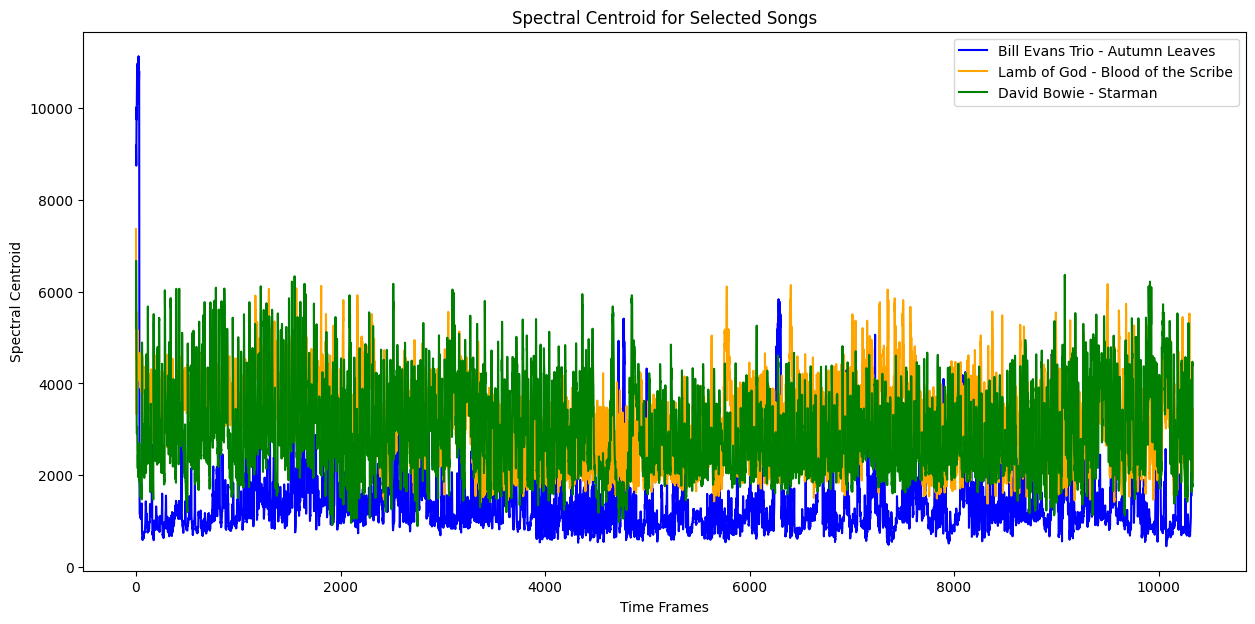

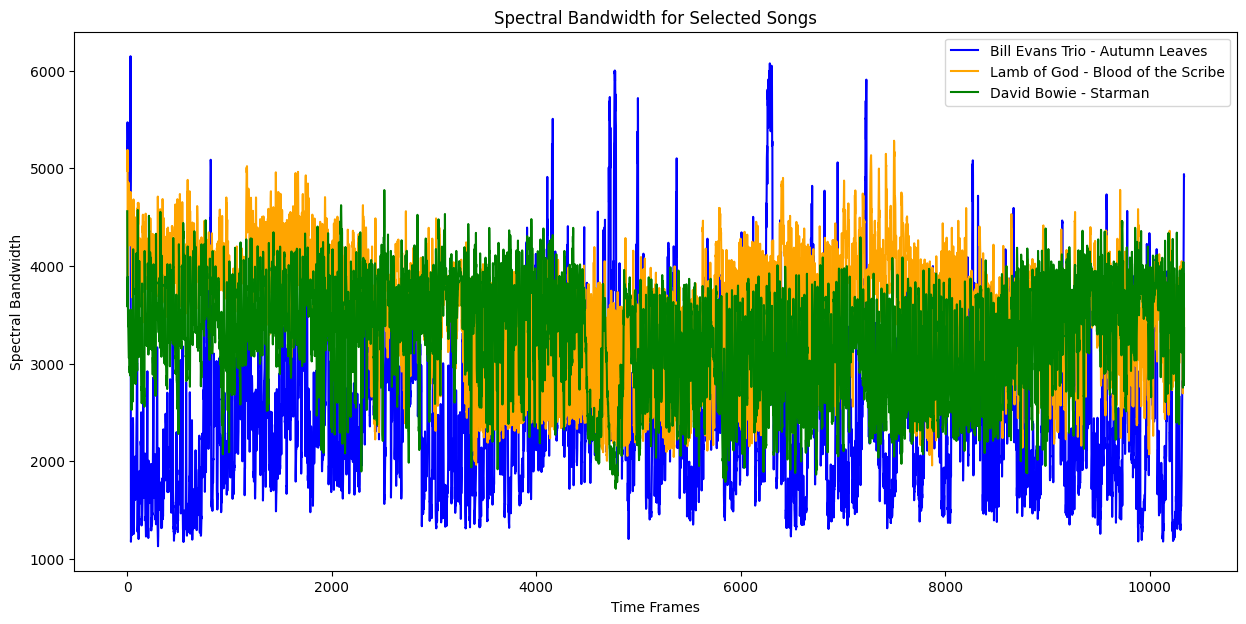

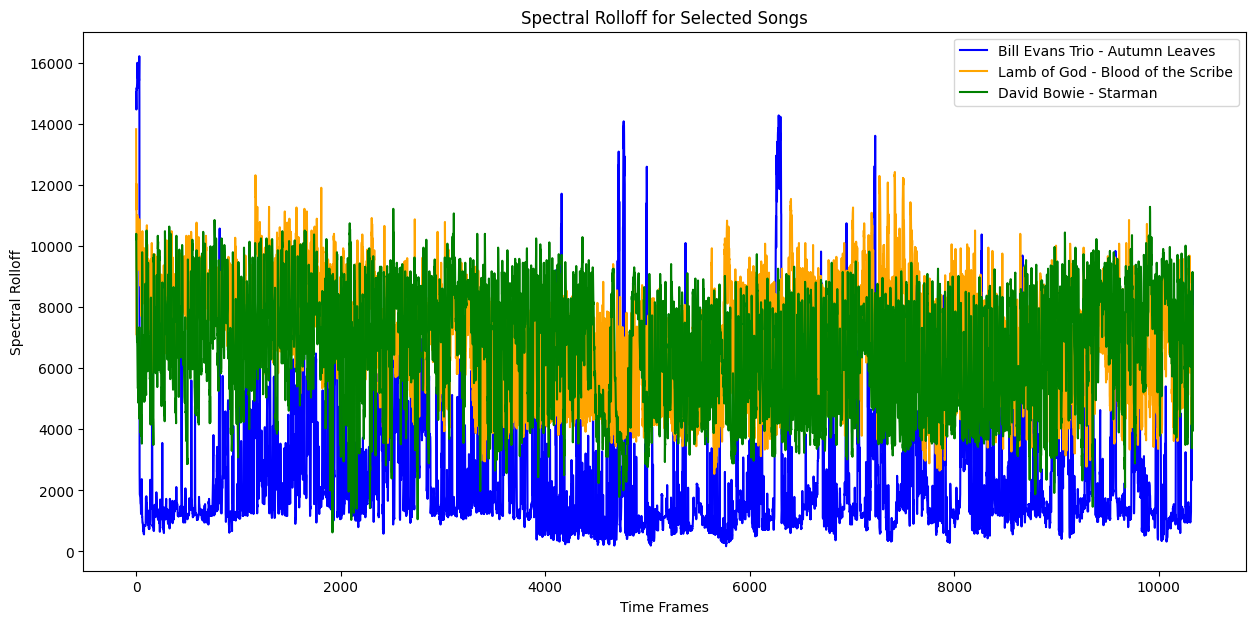

In [9]:
spectral_features = []

for _, row in df.iterrows():
    spectral_centroid = librosa.feature.spectral_centroid(y=row['audio'], sr=sample_rate)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=row['audio'], sr=sample_rate)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(y=row['audio'], sr=sample_rate)[0]
    spectral_features.append({
        'song_name': row['song_name'],
        'genre': row['genre'],
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_rolloff': spectral_rolloff
    })

spectral_df = pd.DataFrame(spectral_features)

# Visualize spectral centroid for the selected songs
plt.figure(figsize=(15,7))

plt.plot(spectral_df.iloc[example_indices[0]]['spectral_centroid'], label=spectral_df.iloc[example_indices[0]]['song_name'], color='b')
plt.plot(spectral_df.iloc[example_indices[1]]['spectral_centroid'], label=spectral_df.iloc[example_indices[1]]['song_name'], color='orange')
plt.plot(spectral_df.iloc[example_indices[2]]['spectral_centroid'], label=spectral_df.iloc[example_indices[2]]['song_name'], color='g')

plt.title('Spectral Centroid for Selected Songs')
plt.xlabel('Time Frames')
plt.ylabel('Spectral Centroid')
plt.legend(loc='upper right')
plt.show()

# Visualize spectral bandwidth for the selected songs
plt.figure(figsize=(15,7))

plt.plot(spectral_df.iloc[example_indices[0]]['spectral_bandwidth'], label=spectral_df.iloc[example_indices[0]]['song_name'], color='b')
plt.plot(spectral_df.iloc[example_indices[1]]['spectral_bandwidth'], label=spectral_df.iloc[example_indices[1]]['song_name'], color='orange')
plt.plot(spectral_df.iloc[example_indices[2]]['spectral_bandwidth'], label=spectral_df.iloc[example_indices[2]]['song_name'], color='g')

plt.title('Spectral Bandwidth for Selected Songs')
plt.xlabel('Time Frames')
plt.ylabel('Spectral Bandwidth')
plt.legend(loc='upper right')
plt.show()

# Visualize spectral rolloff for the selected songs
plt.figure(figsize=(15,7))

plt.plot(spectral_df.iloc[example_indices[0]]['spectral_rolloff'], label=spectral_df.iloc[example_indices[0]]['song_name'], color='b')
plt.plot(spectral_df.iloc[example_indices[1]]['spectral_rolloff'], label=spectral_df.iloc[example_indices[1]]['song_name'], color='orange')
plt.plot(spectral_df.iloc[example_indices[2]]['spectral_rolloff'], label=spectral_df.iloc[example_indices[2]]['song_name'], color='g')

plt.title('Spectral Rolloff for Selected Songs')
plt.xlabel('Time Frames')
plt.ylabel('Spectral Rolloff')
plt.legend(loc='upper right')
plt.show()

Now I will add the above features in the dataframe that will be used for the recommendation system

In [10]:
mfcc_df_final = pd.merge(mfcc_df_final, spectral_df[['song_name', 'spectral_centroid']], on='song_name', how='left')
mfcc_df_final = pd.merge(mfcc_df_final, spectral_df[['song_name', 'spectral_bandwidth']], on='song_name', how='left')
mfcc_df_final = pd.merge(mfcc_df_final, spectral_df[['song_name', 'spectral_rolloff']], on='song_name', how='left')

display(mfcc_df_final.head())

,song_name,genre,mfccs,comprehensive_mfccs,mfcc_std,spectral_centroid,spectral_bandwidth,spectral_rolloff
0,BadBadNotGood - Triangle,jazz,"[[-502.23407, -502.23407, -502.23407, -502.234...","[[-502.23407, -502.23407, -502.23407, -502.234...","[70.70951, 32.376675, 24.528889, 24.444798, 17...","[8497.567331802318, 8166.656006330192, 8226.91...","[4898.717932179247, 4917.905439628931, 4848.27...","[14341.11328125, 14168.84765625, 14125.78125, ..."
1,Bill Evans Trio - Autumn Leaves,jazz,"[[-509.264, -509.264, -509.264, -509.264, -509...","[[-509.264, -509.264, -509.264, -509.264, -509...","[73.59337, 40.415607, 31.353977, 23.821484, 14...","[9175.20005519016, 9025.898539425001, 8975.586...","[5270.728694679566, 5150.332573909313, 5014.42...","[15051.708984375, 14771.77734375, 14577.978515..."
2,Charles Mingus - Better Git It in Your Soul,jazz,"[[-548.5482, -548.55225, -548.6319, -548.6319,...","[[-548.5482, -548.55225, -548.6319, -548.6319,...","[88.2433, 31.45543, 31.036219, 18.84776, 13.45...","[4463.929330383351, 5928.853457985602, 7933.29...","[5396.631724469185, 5946.404526803592, 6054.40...","[11950.927734375, 14211.9140625, 15525.4394531..."
3,Cortex - Sans toi,jazz,"[[-543.21375, -543.21375, -533.58844, -522.841...","[[-543.21375, -543.21375, -533.58844, -522.841...","[62.455803, 36.37327, 26.051222, 20.294922, 16...","[9842.035623397045, 6419.399138419474, 4932.80...","[5531.8705511242015, 5613.084276786799, 5371.6...","[16236.03515625, 13845.849609375, 12230.859375..."
4,"Dave Brubeck, The Dave Brubeck Quartet - Take ...",jazz,"[[-558.07196, -558.07196, -558.07196, -558.071...","[[-558.07196, -558.07196, -558.07196, -558.071...","[51.48849, 22.879866, 20.163109, 16.279581, 8....","[4382.107297712368, 4738.217535929758, 606.634...","[792.6362903983237, 1881.8844193515647, 940.38...","[4715.771484375, 6503.02734375, 1873.388671875..."


Finally I'm calculating the mean of the selected fetures I will use in the recommendation system and I use them to create a similarity matrix to visualize the results
I also did a quick recommendation function based on the cosine similarity to check the results only timbre features yield

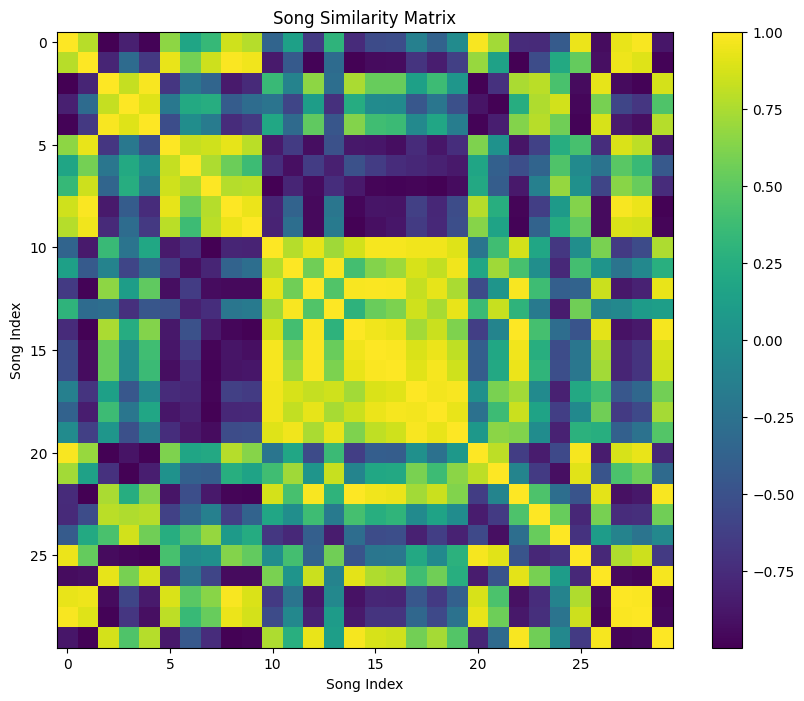

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate mean of a numpy array
def calculate_mean(x):
    return np.mean(x)

# Extract features
feature_columns = ['comprehensive_mfccs', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff']

# Calculate the mean for each feature
mfcc_final_dataset = pd.DataFrame({col: mfcc_df_final[col].apply(calculate_mean) for col in feature_columns})

# Normalize features
scaler = StandardScaler()
final_dataset_scaled = scaler.fit_transform(mfcc_final_dataset)

# Compute similarity matrix
similarity_matrix = cosine_similarity(final_dataset_scaled)

def recommend_songs(song_index, n_recommendations=3, n_farthest=3):
    song_similarities = similarity_matrix[song_index]
    similar_indices = song_similarities.argsort()[::-1][1:n_recommendations+1]  # Exclude the song itself
    farthest_indices = song_similarities.argsort()[1:n_farthest+1]  # Exclude the song itself
    
    recommendations = pd.DataFrame({
        'song_name': mfcc_df_final.iloc[similar_indices]['song_name'].values,
        'genre': mfcc_df_final.iloc[similar_indices]['genre'].values,
        'similarity': song_similarities[similar_indices]
    })
    
    farthest = pd.DataFrame({
        'song_name': mfcc_df_final.iloc[farthest_indices]['song_name'].values,
        'genre': mfcc_df_final.iloc[farthest_indices]['genre'].values,
        'similarity': song_similarities[farthest_indices]
    })
    
    return recommendations.sort_values('similarity', ascending=False), farthest.sort_values('similarity', ascending=True)

# Visualize similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.title('Song Similarity Matrix')
plt.xlabel('Song Index')
plt.ylabel('Song Index')
plt.show()

And run a test for each of the selected songs

In [14]:
# Timbre only results
nearest, farthest = recommend_songs(example_indices[0])

print(f"Recommendations for '{mfcc_df_final.iloc[example_indices[0]]['song_name']}':")
print("\nNearest songs:")
print(nearest)
print("\nFarthest songs:")
print(farthest)

nearest, farthest = recommend_songs(example_indices[1])

print(f"\nRecommendations for '{mfcc_df_final.iloc[example_indices[1]]['song_name']}':")
print("\nNearest songs:")
print(nearest)
print("\nFarthest songs:")
print(farthest)

nearest, farthest = recommend_songs(example_indices[2])

print(f"\nRecommendations for '{mfcc_df_final.iloc[example_indices[2]]['song_name']}':")
print("\nNearest songs:")
print(nearest)
print("\nFarthest songs:")
print(farthest)

Recommendations for 'Bill Evans Trio - Autumn Leaves':

Nearest songs:
                                   song_name genre  similarity
0                        Ryo Fukui - Scenery  jazz    0.992059
1  Snarky Puppy - Shofukan (We Like It Here)  jazz    0.958833
2          Pink Floyd - Breathe (In The Air)  rock    0.947139

Farthest songs:
                                    song_name  genre  similarity
0  Lamb of God - Another Nail For Your Coffin  metal   -0.987048
1                              Soen - Monarch   rock   -0.981938
2                      Gojira - All The Tears  metal   -0.979722

Recommendations for 'Lamb of God - Blood of the Scribe':

Nearest songs:
                            song_name  genre  similarity
0           Parkway Drive - Boneyards  metal    0.989596
1              Gojira - All The Tears  metal    0.986137
2  Fit For An Autopsy - Black Mammoth  metal    0.969474

Farthest songs:
                                   song_name genre  similarity
0            Bill 